#### 피싱사이트 URL 추출 관련 데이터 시각화

In [97]:
import pandas as pd
from collections import Counter
import re


In [98]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from wordcloud import WordCloud
import seaborn as sns


In [99]:
# 한글폰트 path 설정
font_path = 'C:\\windows\\Fonts\\malgun.ttf'

font_prop = fm.FontProperties(fname=font_path).get_name()
print(font_prop)

matplotlib.rc('font', family=font_prop)

Malgun Gothic


In [100]:
data = pd.read_csv('data/한국인터넷진흥원_피싱사이트 URL_20231231.csv')

print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [101]:
print(data.columns)


Index(['날짜', '홈페이지주소'], dtype='object')


In [102]:
data.head(10)

,날짜,홈페이지주소
0,2023-01-01,https://nuly.do/6FVa
1,2023-01-01,http://yufsv3.zoeu.uno
2,2023-01-01,http://han.gl/RVeMq
3,2023-01-01,https://han.gl/pxkQl
4,2023-01-02,https://c11.kr/195x9
5,2023-01-02,bmk.ilogensn.com/
6,2023-01-02,bns.ilogensn.com/
7,2023-01-02,https://c11.kr/195s9
8,2023-01-02,bsk.ilogensn.com/
9,2023-01-02,https://c11.kr/195s9


In [103]:
urls = data['홈페이지주소'].dropna().astype(str)

tokens = []

for url in urls:
    # https:// 제거 후 split
    clean = re.sub(r'https?://', '', url)
    
    # 특수문자 기준으로 split
    parts = re.split(r'[./?=&_-]', clean)
    tokens.extend([word.lower() for word in parts if len(word) > 2 and word.isalpha()])

counter = Counter(tokens)

# 상위 단어 출력
print("피싱 URL에서 자주 등장하는 단어 Top 30:")
for word, freq in counter.most_common(30):
    print(f"{word}: {freq}")

피싱 URL에서 자주 등장하는 단어 Top 30:
pro: 10709
yahwagsc: 10665
com: 2588
han: 1537
hair: 908
wtf: 810
buly: 752
golf: 586
buzz: 583
www: 535
info: 462
store: 309
xyz: 299
site: 286
best: 275
pics: 260
top: 234
naver: 234
link: 221
swyg: 218
bit: 183
lat: 173
autos: 170
zxcv: 161
lol: 152
yachts: 139
life: 121
live: 119
dvcho: 111
skin: 109


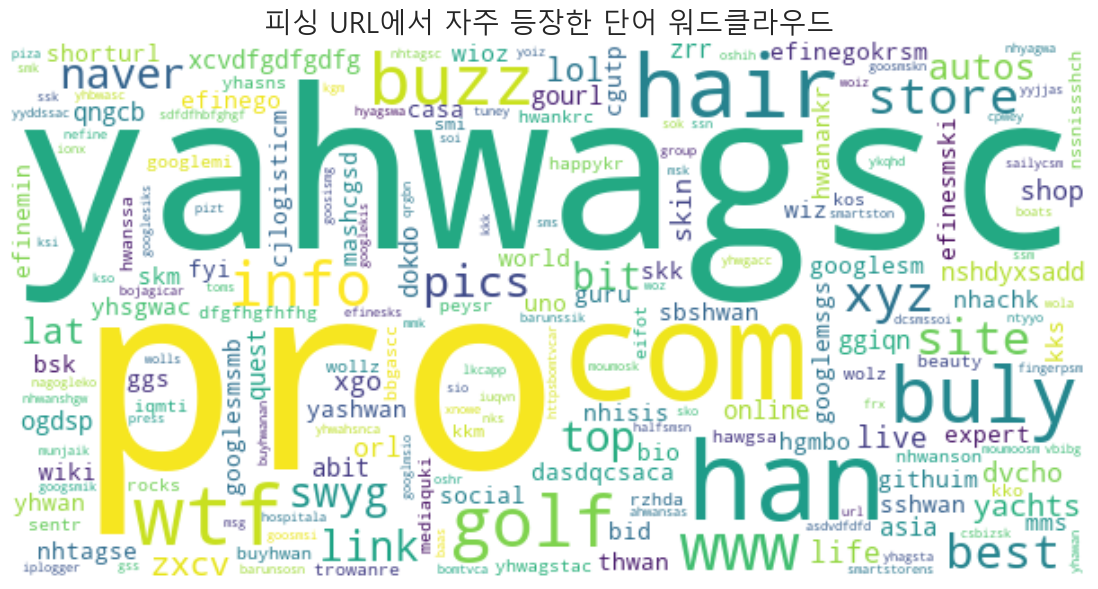

In [104]:
wordcloud = WordCloud (
    width=600,
    height=300,
    background_color='white',
    colormap='viridis',
    font_path=None 
).generate_from_frequencies(counter)

# 7. 시각화
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("피싱 URL에서 자주 등장한 단어 워드클라우드", fontsize=20)
plt.show()

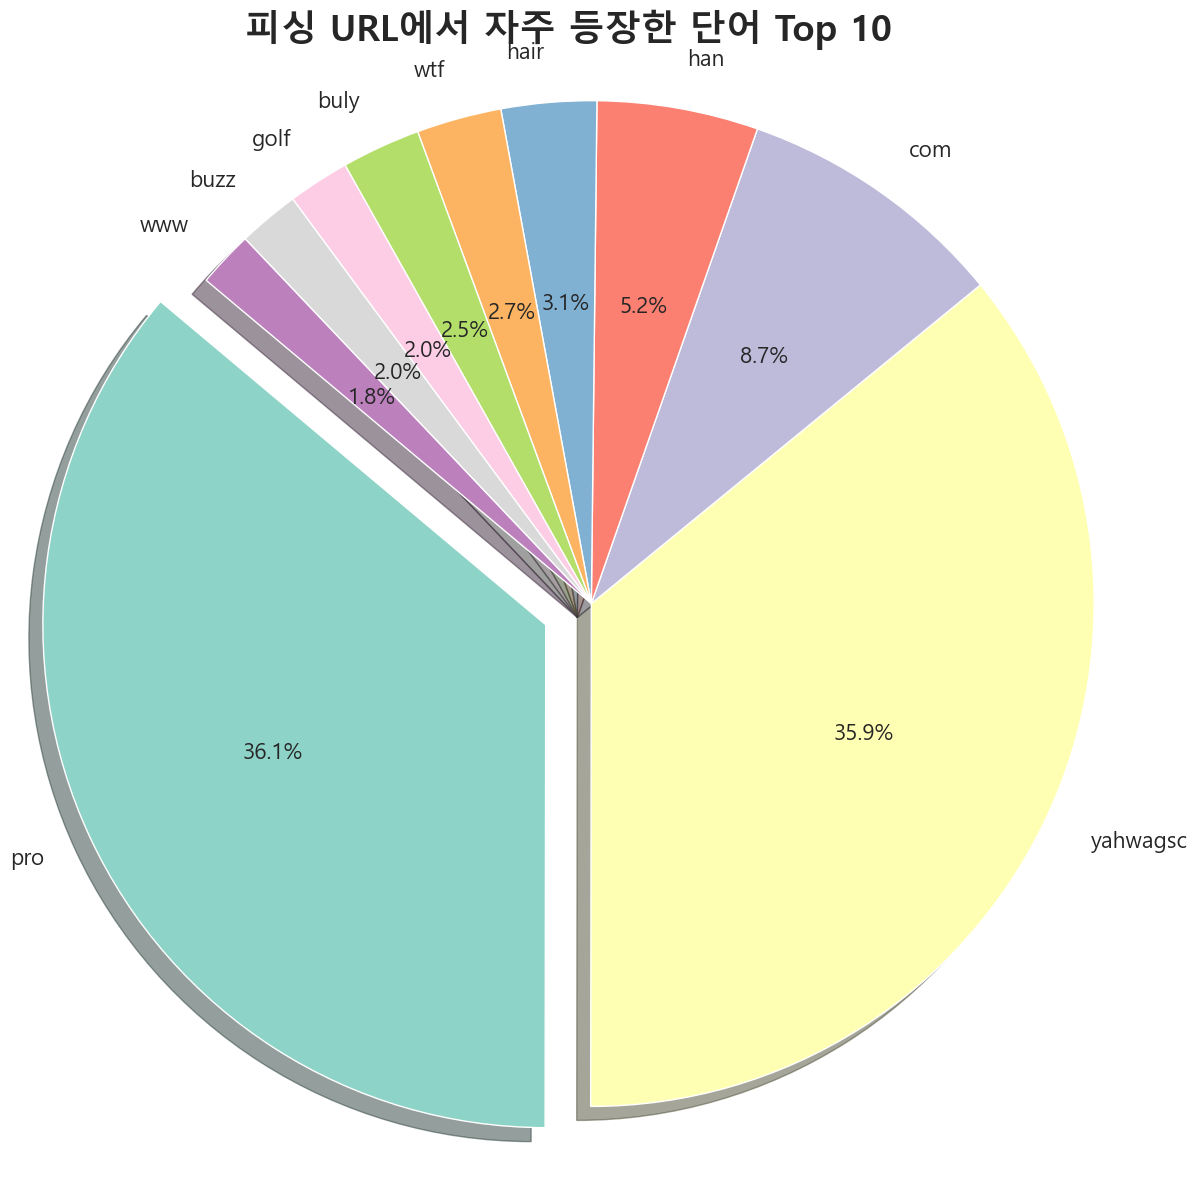

In [105]:
#피싱 URL에서 자주 등장한 단어 Top 10
# seaborn 색상 팔레트 사용
colors = sns.color_palette('Set3', n_colors=10)

# explode 설정 (가장 큰 조각만 강조)
explode = [0.1 if i == 0 else 0 for i in range(len(sizes))]

# 시각화
plt.figure(figsize=(12, 12))
wedges, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    shadow=True,
    explode=explode,
    colors=colors,
    textprops={'fontsize': 16}
)

plt.axis('equal')
plt.title("피싱 URL에서 자주 등장한 단어 Top 10", fontsize=26, 
          fontweight='bold')
plt.tight_layout()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_17124\2982444335.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=domain_counts.values, y=domain_counts.index, palette='Set2')


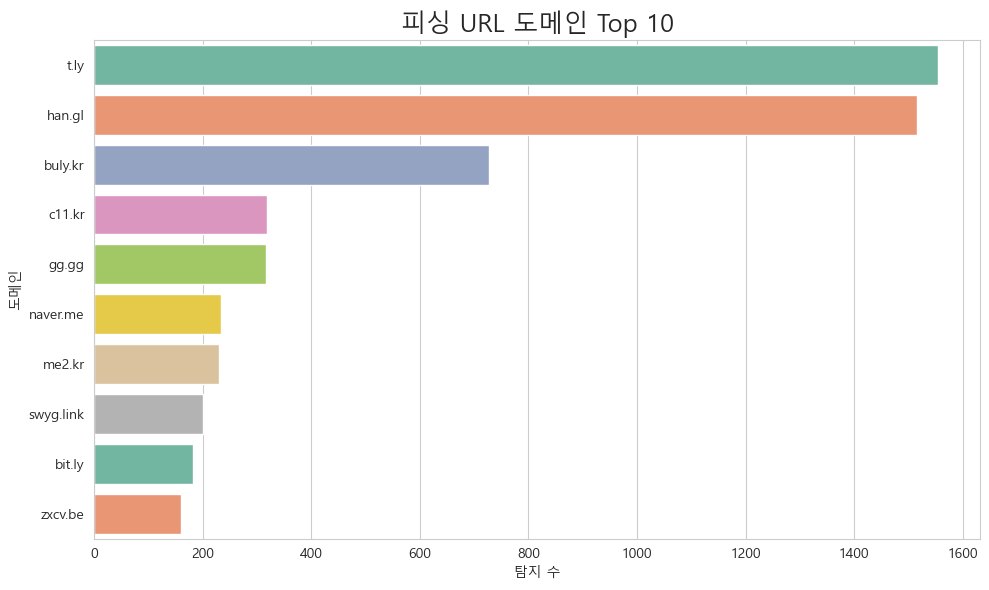

In [ ]:
# 도메인 별 피싱 URL 빈도 수 barplot
data['도메인'] = data['홈페이지주소'].str.extract(r'https?://([^/]+)')
domain_counts = data['도메인'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=domain_counts.values, y=domain_counts.index, palette='Set2')

plt.title('피싱 URL 도메인 Top 10', fontsize=18)
plt.xlabel('탐지 수')
plt.ylabel('도메인')
plt.tight_layout()
plt.show()

In [108]:
sns.set_style('whitegrid')

# 한글 폰트 설정 (윈도우 예시)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 날짜 컬럼을 datetime 타입으로 변환
data['날짜'] = pd.to_datetime(data['날짜'])

# 월 단위 컬럼 생성
data['month'] = data['날짜'].dt.to_period('M')

# 월별 탐지 수 집계
monthly_counts = data['month'].value_counts().sort_index()


C:\Users\user\AppData\Local\Temp\ipykernel_17124\3797914199.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_counts.index.astype(str), y=monthly_counts.values, palette='Set2')


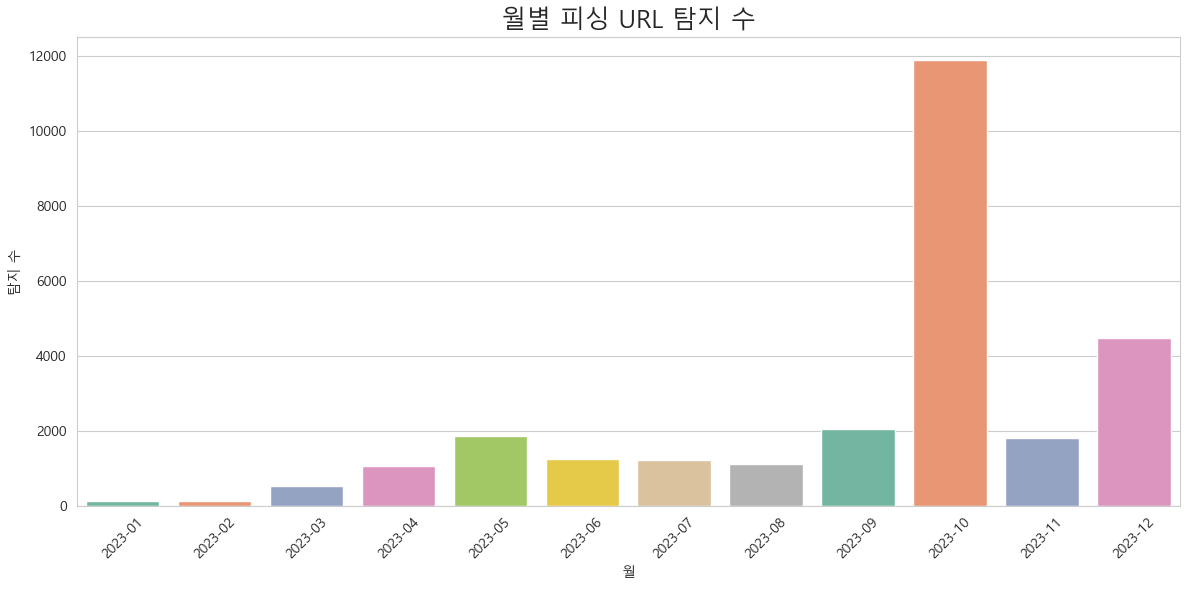

In [ ]:
# 시각화
plt.figure(figsize=(12, 6))

sns.barplot(x=monthly_counts.index.astype(str), y=monthly_counts.values, palette='Set2')

plt.title('월별 피싱 URL 탐지 수', fontsize=18)
plt.xlabel('월')
plt.ylabel('탐지 수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()